# Introduction

In this report, we basically discuss the subject of specifying a large mart sale or predicting an item for a customer’s future need in a few supermarkets in various locations and products that
support the previous record. Various ML algorithms such as linear regression, randomforest, etc. are used to predict sales volume. As we know, good marketing is probably the sucess for all organizations, so sales forecasting now plays an important role in any shopping mall. It is always helpful to predict the best, and develop business strategies about useful markets andtoimprove market knowledge. Regular sales forecasting research can help in-depth analysis ofpre-existing conditions and conditions and then, assumptions are often used in terms ofcustomer acquisition, lack of funding, and strength before setting budgets and marketing plans for the coming year.

3) OBJECTIVES:-

a) Predicting future sales from a given dataset.

b) To understand the key features that are responsible for the sale of a particular product.

c) Find the best algorithm that will predict sales with the greatest accuracy

#Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


#Step 1. Data Collection
We are loading Our Dataset from csv file to Pandas Dataframe

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [3]:
bg_data = pd.read_csv('Train.csv')

In [4]:
bg_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
bg_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Number of rows and number of column in dataframe
bg_data.shape

(8523, 12)

In [7]:
# Information about dataframe
bg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# . Data preprocessing

In [8]:
# Checking the missing values in dataframe
bg_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values in column
Item_Weight- Replacing with Mean value

Outlet_Size - Replacing with Mode

In [9]:
# mean value of column Item_weight
bg_data['Item_Weight'].mean()

12.857645184135976

In [10]:
# fillna will be used to fill the missing value in column Item_weight
bg_data['Item_Weight'].fillna(bg_data['Item_Weight'].mean(),inplace=True)

In [11]:
# mode of "Outlet_Size" column
bg_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [12]:
# Checking the missing values in dataframe
bg_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values in column Outlet_Size - Replacing with Mode value

In [13]:
Outlet_size_mode = bg_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [14]:
print(Outlet_size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [15]:
missing_value = bg_data['Outlet_Size'].isnull()
print(missing_value)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [16]:
bg_data.loc[missing_value, 'Outlet_Size']= bg_data.loc[missing_value, 'Outlet_Type'].apply(lambda x: Outlet_size_mode[x])

In [17]:
bg_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [18]:
# Describe will give stastical information about data
bg_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [19]:
sns.set()

<ipython-input-20-f6022bcc0d94>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bg_data['Item_Weight'],color="g")


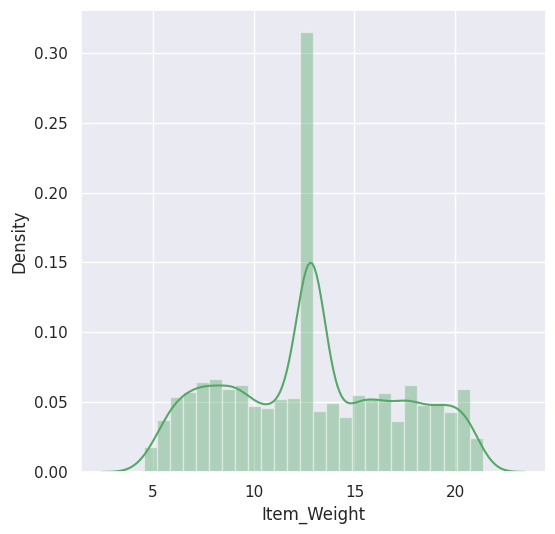

In [20]:
# Item weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(bg_data['Item_Weight'],color="g")
plt.show()

<ipython-input-21-fd8c99d8e506>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bg_data['Item_Visibility'])


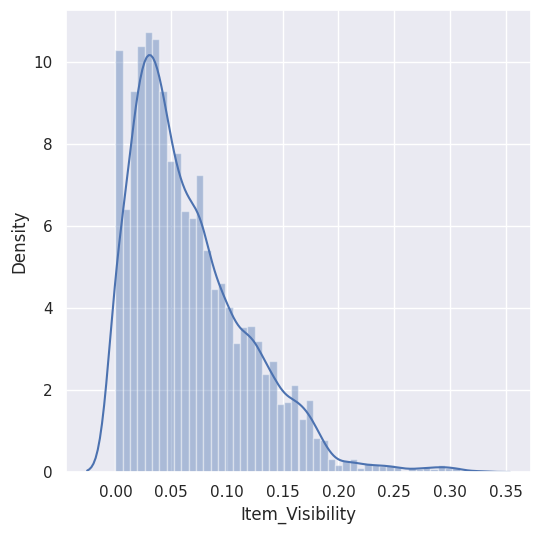

In [21]:
# Item Visibility Distribution
plt.figure(figsize=(6,6))
sns.distplot(bg_data['Item_Visibility'])
plt.show()

<ipython-input-22-db60c46483ad>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bg_data['Item_MRP'],color="m")


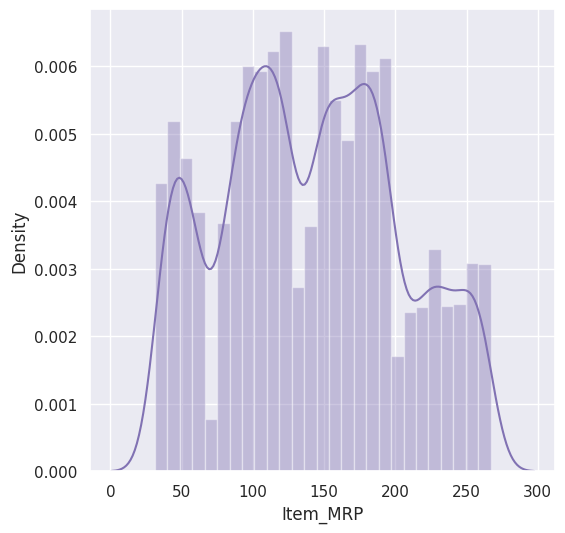

In [22]:
# Item_MRP Distribution
plt.figure(figsize=(6,6))
sns.distplot(bg_data['Item_MRP'],color="m")
plt.show()

<ipython-input-23-e006e99f868e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bg_data['Item_Outlet_Sales'])


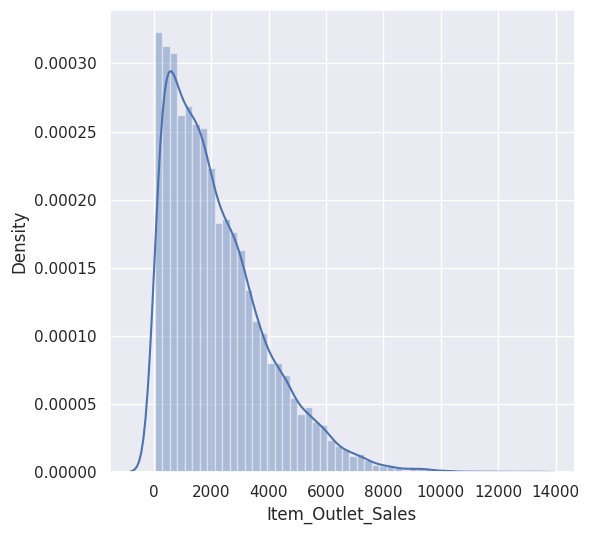

In [23]:
# Item_Outlet_Sales Distribution
plt.figure(figsize=(6,6))
sns.distplot(bg_data['Item_Outlet_Sales'])
plt.show()


<ipython-input-24-670080b0f6a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Outlet_Establishment_Year',data = bg_data,palette=("magma"))


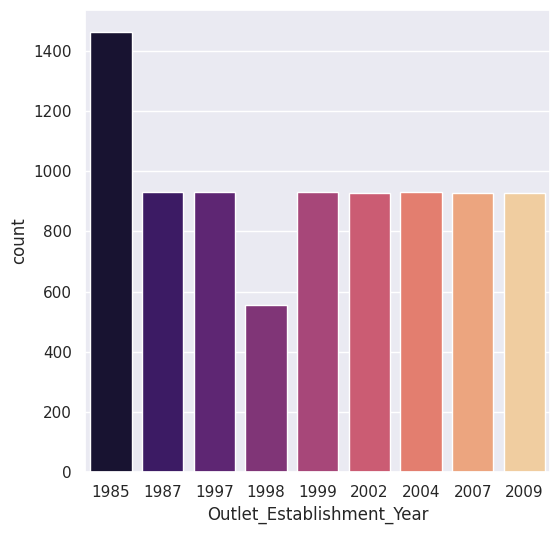

In [24]:
# Outlet_Establishment_Year Distribution
plt.figure(figsize=(6,6))
sns.countplot(x ='Outlet_Establishment_Year',data = bg_data,palette=("magma"))
plt.show()

#Categorical Features

<ipython-input-25-55f94c95a49b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=bg_data, palette='magma')


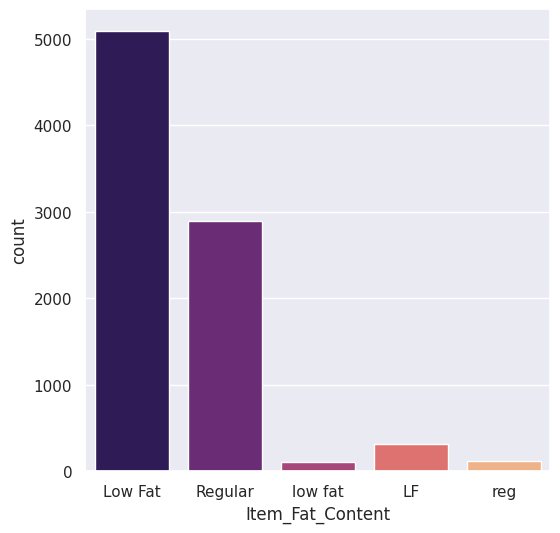

In [25]:
# Item_Fat_Content Column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=bg_data, palette='magma')
plt.show()

<ipython-input-26-a1c282af90e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=bg_data, palette='pastel')


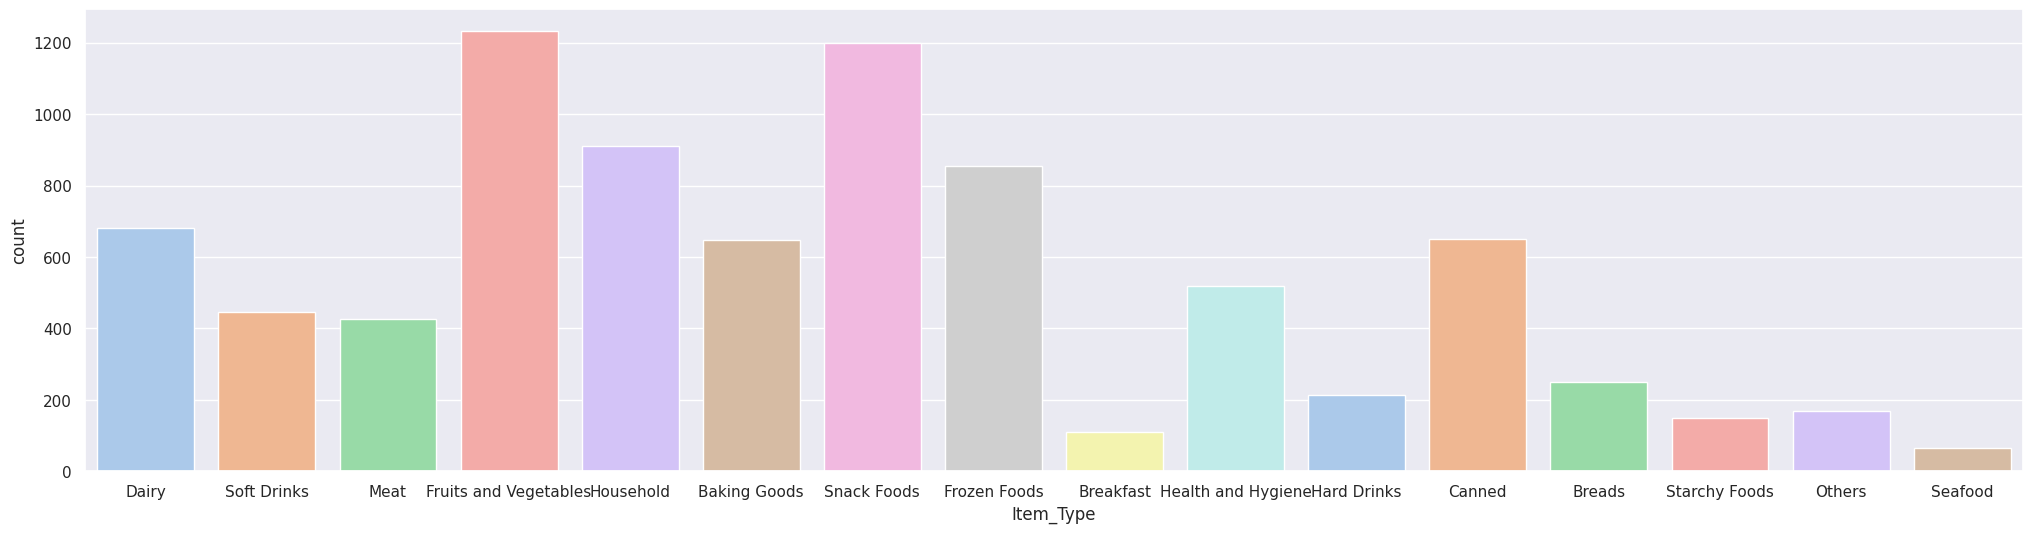

In [26]:
# Item_Type Column
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=bg_data, palette='pastel')
plt.show()

<ipython-input-27-1a64174369a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Size',data=bg_data, palette='Paired')


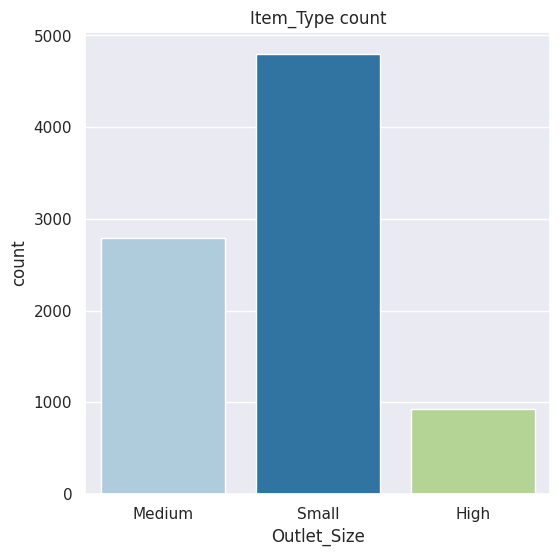

In [27]:
# Outlet_size Column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=bg_data, palette='Paired')
plt.title('Item_Type count')
plt.show()

In [28]:
bg_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
bg_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [30]:
bg_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace = True)

In [31]:
bg_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#Label Encoding

Transferring Categorical value to Numeric value

In [32]:
encoder = LabelEncoder()

In [33]:
bg_data['Item_Identifier'] = encoder.fit_transform(bg_data['Item_Identifier'])

bg_data['Item_Fat_Content'] = encoder.fit_transform(bg_data['Item_Fat_Content'])

bg_data['Item_Type'] = encoder.fit_transform(bg_data['Item_Type'])

bg_data['Outlet_Identifier'] = encoder.fit_transform(bg_data['Outlet_Identifier'])

bg_data['Outlet_Size'] = encoder.fit_transform(bg_data['Outlet_Size'])

bg_data['Outlet_Location_Type'] = encoder.fit_transform(bg_data['Outlet_Location_Type'])

bg_data['Outlet_Type'] = encoder.fit_transform(bg_data['Outlet_Type'])


In [34]:
bg_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting data into Features and Target Variables

In [35]:
X = bg_data.drop(columns='Item_Outlet_Sales', axis = 1)
y = bg_data['Item_Outlet_Sales']

In [36]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [37]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


#Perform Modelling Techniques

Implementation and Comaprison of Different Machine learning Algorithm

In [40]:
regressor = XGBRegressor()

In [41]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [43]:
# R squared Value
r2_train_ = metrics.r2_score(y_train, training_data_prediction)
r2_test_ = metrics.r2_score(y_test, test_data_prediction)
# Mean squared error
MSE = metrics.mean_absolute_error(y_test, test_data_prediction)

In [44]:
print('R Squared value = ', r2_train_)
print('R Squared value = ', r2_test_)
print('MSE Value: =', MSE)


R Squared value =  0.8762174618111388
R Squared value =  0.5017253991620692
MSE Value: = 866.2585390253303


# Linear Regression

In [45]:
regressor1 =  LinearRegression()


In [46]:
regressor1.fit(X_train, y_train)

LinearRegression()

In [47]:
# prediction on training and testing data
training_data_prediction1 = regressor1.predict(X_train)
test_data_prediction1 = regressor1.predict(X_test)

In [48]:
# R squared Value
r2_train1 = metrics.r2_score(y_train, training_data_prediction1)
r2_test1 = metrics.r2_score(y_test, test_data_prediction1)
# Mean squared error
MSE_test1 = metrics.mean_absolute_error(y_test, test_data_prediction1)


In [49]:
print('R Squared value = ', r2_train1)
print('R Squared value = ', r2_test1)
print('MSE Value: = ', MSE_test1)

R Squared value =  0.5071929167339231
R Squared value =  0.48912987193626367
MSE Value: =  944.869172118322


# Decision Tree Regression

In [50]:
regressor3 = DecisionTreeRegressor()

In [51]:
regressor3.fit(X_train, y_train)

DecisionTreeRegressor()

In [52]:
# prediction on training data
training_data_prediction3 = regressor3.predict(X_train)
# prediction on test data
test_data_prediction3 = regressor3.predict(X_test)

In [53]:
# R squared Value
r2_train3 = metrics.r2_score(y_train, training_data_prediction3)
r2_test3 = metrics.r2_score(y_test, test_data_prediction3)
# Mean squared error
MSE_test3 = metrics.mean_absolute_error(y_test, test_data_prediction3)

In [54]:
print('R Squared value = ', r2_train3)
print('R Squared value = ', r2_test3)

R Squared value =  1.0
R Squared value =  0.17701437862125413


# RandomForestRegression

In [55]:
regressor4 = RandomForestRegressor(n_estimators = 1000)

In [56]:
regressor4.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [57]:
# prediction on training data
training_data_prediction4 = regressor4.predict(X_train)
test_data_prediction4 = regressor4.predict(X_test)

In [58]:
# R squared Value
r2_train4 = metrics.r2_score(y_train, training_data_prediction4)
r2_test4 = metrics.r2_score(y_test, test_data_prediction4)
# Mean squared error
MSE_test4 = metrics.mean_absolute_error(y_test, test_data_prediction4)

In [59]:
print('R Squared value = ', r2_train4)
print('R Squared value = ', r2_test4)
print('MSE Value: = ', MSE_test4)

R Squared value =  0.9402166725727956
R Squared value =  0.5527990108214904
MSE Value: =  823.23404801783


# Conclusion

To forecast BigMart’s Sales Revenue, Simple to advanced ML algorithms have been implemented, such as LR, Decision Tree, RF regression and XGBoost. From the Above Algorithm, we conclude that the RandomForest Regression algorithm is more efficient and gives accurate and fast results.